In [1]:
# importing necessary packages
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn import linear_model
import matplotlib.pyplot as plt

# notebook settings
pd.set_option('display.max_columns', None)

In [2]:
def coef_graph():
    # plotting columns and their coef impact on predictions
    coefs = pd.DataFrame(
    regr.coef_,
    #  columns=['Coefficients'], index=X_train.columns
    columns=['Coefficients'], index=X.columns
    )

    # sort coefficients highest to lowest
    coefs.sort_values(by=['Coefficients'], inplace=True)

    # function to add value labels
    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i,y[i],y[i])

    # creating the graph
    coefs.plot(kind='barh', figsize=(9, 7))
    plt.title('Linear Regression Model')
    plt.axvline(x=0, color='.5')
    plt.subplots_adjust(left=.3)

# Data Preprocessing

In [3]:
ml_df = pd.read_csv('./data/machine-learning.csv', index_col=0)

# dropping redundant columns
ml_df.drop(['E_DAYPOP', 'C-E_DAYPOP'], axis=1, inplace=True)

# dropping features
ml_df.drop(['E_AGE65', 'E_AGE17', 'C-E_AGE65', 'C-E_AGE17', 'E_TOTPOP', 'E_HU', 'E_HH', 'C-E_HU', 'C-E_HH', 'C-E_TOTPOP'], axis=1, inplace=True)

In [4]:
# Splitting dataset for predictions
y = ml_df['Risk Category']
X = ml_df.drop(['C-Deaths', 'Deaths', 'Deaths per 100,000 Population', 'C-Deaths per 100,000 Population', 'Risk Category'], axis=1)  # ensure learning is blind to any death values

In [5]:
# Scaling X learning data
scaler = preprocessing.MinMaxScaler()
names = X.columns
d = scaler.fit_transform(X)
X = pd.DataFrame(d, columns=names)

# Random Forest Approach

In [6]:
# Importing necessary packages
import pandas as pd
# from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [7]:
# Defining learning method
rfc = RandomForestClassifier(
    max_depth=9,
    n_estimators = 1000,
    max_features = 12,
    n_jobs = -1
    )

# Defining oversampling method
smote = SMOTE(sampling_strategy='not majority')

# Define the learning pipeline
clf = Pipeline(steps=[('sampling', smote), ('classifier', rfc)])


Model accuracy on testing data: 0.8531468531468531
Model accuracy on training data: 0.9313411078717201
              precision    recall  f1-score   support

           0       0.47      0.75      0.58       232
           1       0.96      0.87      0.91      1484

    accuracy                           0.85      1716
   macro avg       0.72      0.81      0.75      1716
weighted avg       0.89      0.85      0.87      1716


Model accuracy on testing data: 0.8390670553935861
Model accuracy on training data: 0.9268328232036146
              precision    recall  f1-score   support

           0       0.50      0.76      0.60       274
           1       0.95      0.85      0.90      1441

    accuracy                           0.84      1715
   macro avg       0.72      0.81      0.75      1715
weighted avg       0.88      0.84      0.85      1715


Model accuracy on testing data: 0.8489795918367347
Model accuracy on training data: 0.9312053636496137
              precision    recall 

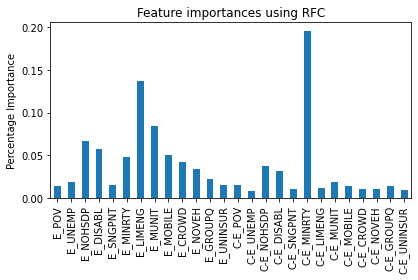

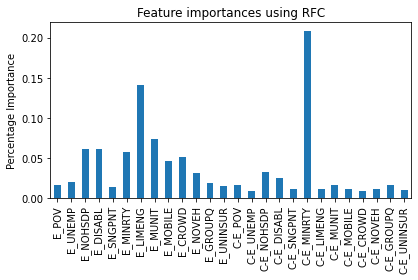

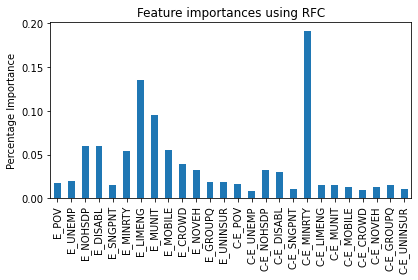

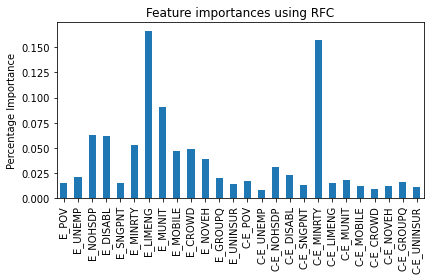

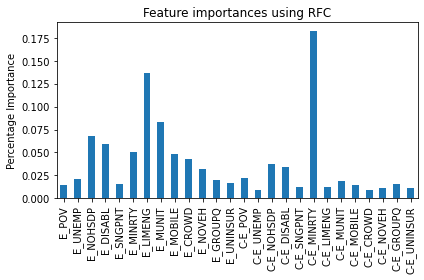

In [8]:
# Splitting X and y into training datasets
# kf = KFold(n_splits=10, shuffle=True)
kf = KFold(n_splits=5, shuffle=True)
for train_index,val_index in kf.split(X):
    X_train,X_test = X.iloc[train_index],X.iloc[val_index],
    y_train,y_test = y.iloc[train_index],y.iloc[val_index]

    clf.fit(X_train, y_train)

    # testing model for general accuracy
    print(f'\nModel accuracy on testing data: {clf.score(X_test, y_test)}')
    print(f'Model accuracy on training data: {clf.score(X_train, y_train)}')

    # Creating confusion matrix
    predictions = clf.predict(X_test)
    cm = confusion_matrix(y_test, predictions)

    # Printing summary of model
    # recall - correct positives
    # precision - false positives
    print(classification_report(y_test, predictions))

    # Displaying feature importances
    importances = clf[1].feature_importances_
    forest_importances = pd.Series(importances, index=X.columns)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances using RFC")
    ax.set_ylabel("Percentage Importance")
    fig.tight_layout()
    fig